In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df_train = pd.read_csv('file:///D:/Project/train.csv')
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000


In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df_train.duplicated().sum()


0

In [11]:
len(df_train.Id.unique())

1168

##We will drop Id column since it wont be that helpful on prediction and we will split the data into 4 parts to make our analysis easier.

In [13]:
def Drop_id(df): ###droping the id column.
    """Function that drops Id column"""
    df.drop('Id', axis=1, inplace = True)
    return df
    

In [14]:
df_train = Drop_id(df_train)

In [15]:
###Splitting the Table.
df_train1, df_train2, df_train3, df_train4, df_Target = df_train.iloc[:,:20], df_train.iloc[:,20:40], df_train.iloc[:,40:64], df_train.iloc[:,64:79], df_train['SalePrice']



In [16]:
df_train1.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
Street             0
Alley           1091
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
dtype: int64

In [17]:
def Filling_NaN1(df): ####### Filling NaN values in the First table
    df['Alley'].replace(np.nan, 'No_access', inplace = True)
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer
    imp = IterativeImputer(max_iter=10, random_state=0)
    imp.fit(df_train1[['LotArea','LotFrontage']])
    df[['LotArea','LotFrontage']] = np.round(imp.transform(df[['LotArea','LotFrontage']]))
    return df

In [18]:
df_train1 = Filling_NaN1(df_train1)

In [19]:
df_train1.isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [20]:
df_train2.isnull().sum()

RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       7
MasVnrArea       7
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual        30
BsmtCond        30
BsmtExposure    31
BsmtFinType1    30
BsmtFinSF1       0
BsmtFinType2    31
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
dtype: int64

In [22]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_train.columns if df_train[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_train[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1832  % missing values
Alley 0.9341  % missing values
MasVnrType 0.006  % missing values
MasVnrArea 0.006  % missing values
BsmtQual 0.0257  % missing values
BsmtCond 0.0257  % missing values
BsmtExposure 0.0265  % missing values
BsmtFinType1 0.0257  % missing values
BsmtFinType2 0.0265  % missing values
FireplaceQu 0.4717  % missing values
GarageType 0.0548  % missing values
GarageYrBlt 0.0548  % missing values
GarageFinish 0.0548  % missing values
GarageQual 0.0548  % missing values
GarageCond 0.0548  % missing values
PoolQC 0.994  % missing values
Fence 0.7971  % missing values
MiscFeature 0.9623  % missing values


##Since they are many missing values, we need to find the relationship between missing values and Sales Price


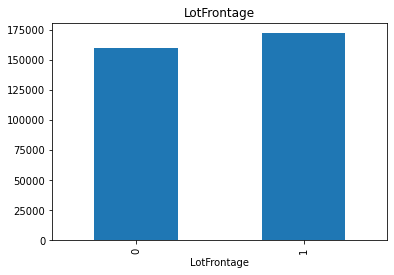

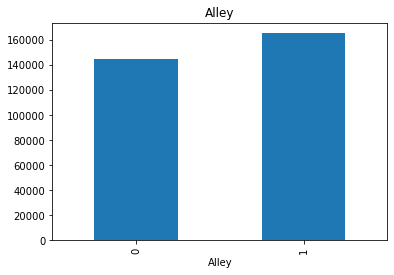

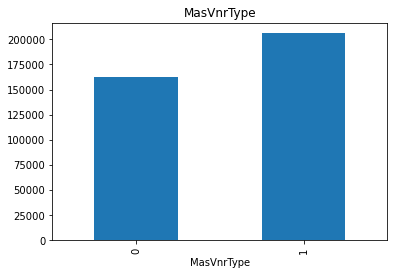

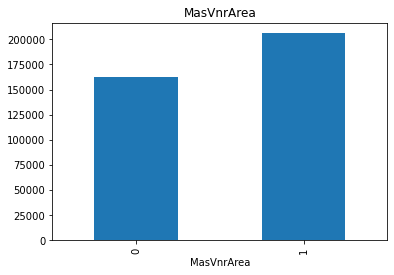

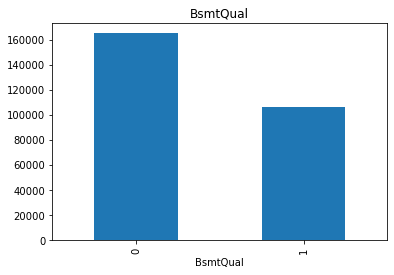

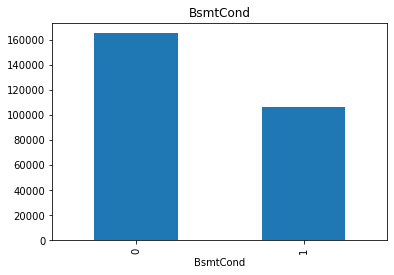

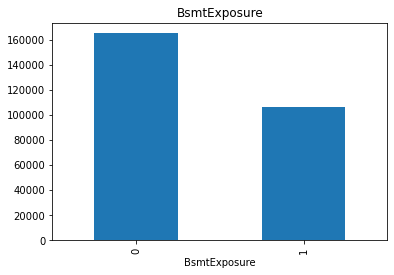

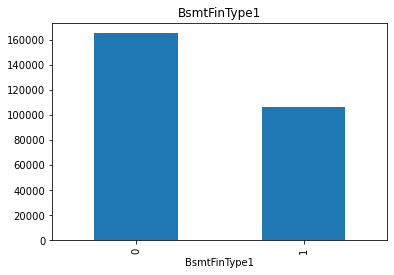

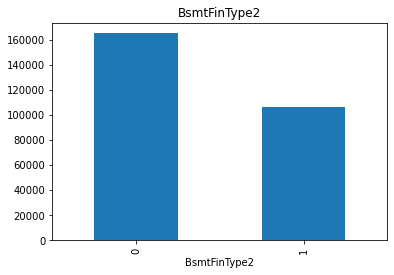

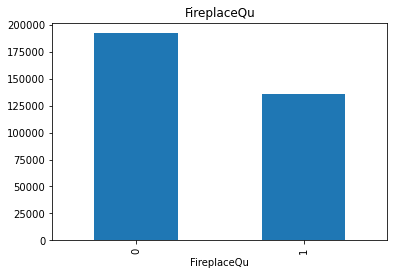

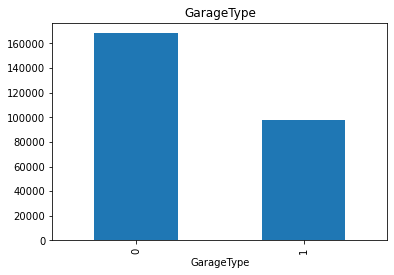

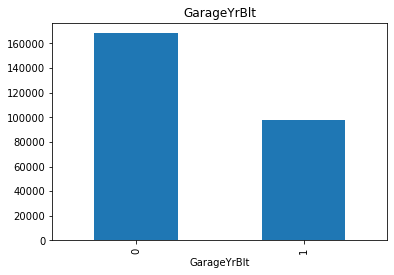

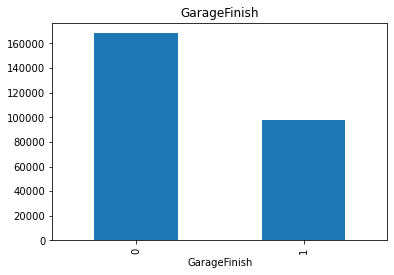

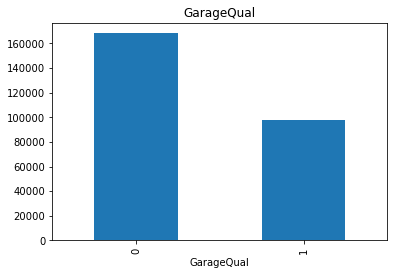

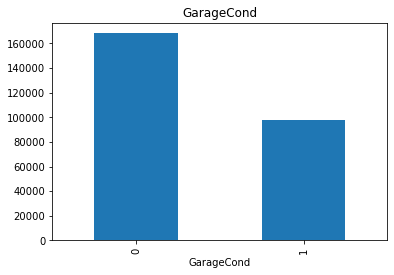

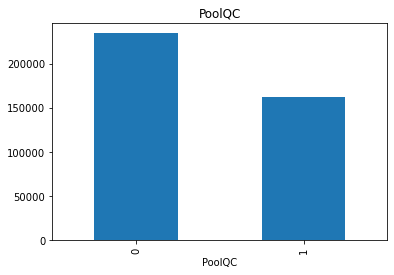

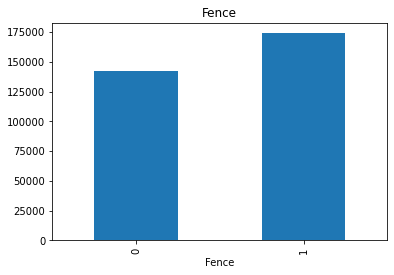

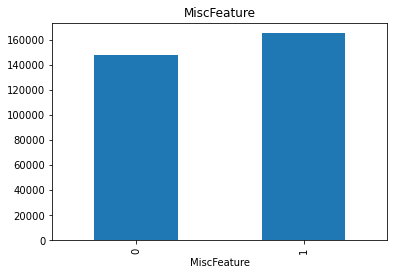

In [24]:
for feature in features_with_na:
    data = df_train.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [29]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  38


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,120,NaN,4928,6,5,1976,1976,0.0,120,0,...,205,0,0,0,0,1,0,2,2007,128000
1,20,95.0,15865,8,6,1970,1970,0.0,351,823,...,207,0,0,224,0,1,0,10,2007,268000
2,60,92.0,9920,7,5,1996,1997,0.0,862,0,...,130,0,0,0,0,1,0,6,2007,269790
3,20,105.0,11751,6,6,1977,1977,480.0,705,0,...,122,0,0,0,0,1,0,1,2010,190000
4,20,NaN,16635,6,7,1977,2000,126.0,1246,0,...,0,0,0,0,0,1,0,6,2009,215000


In [30]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [32]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, data[feature].unique())

YearBuilt [1976 1970 1996 1977 2006 1957 1965 1947 1937 2003 1960 1955 1923 1930
 2007 2001 1972 1950 1961 1953 1918 2010 1922 1934 2005 1946 1941 1948
 1975 1978 1956 2004 1982 2000 2002 1920 1992 1936 1967 1989 1929 1968
 1959 1935 1966 1931 1916 1998 1962 1974 1926 1904 1995 1969 1985 1963
 1958 1892 2008 1971 1980 1945 1986 1981 1949 1940 1954 1925 1915 1921
 1924 1999 1951 1993 1964 1900 1919 1910 1938 1880 1988 1911 1990 1979
 1927 1983 1994 2009 1928 1917 1898 1997 1984 1973 1952 1939 1987 1890
 1942 1991 1932 1908 1914 1882 1905 1875 1906 1893 1912 1913]
YearRemodAdd [1976 1970 1997 1977 2000 2006 1996 1965 1950 2003 1960 1955 2007 2001
 1961 1998 1953 2010 1995 2005 1992 1975 1978 1982 2002 1989 1967 1968
 1959 2004 1966 2008 1987 1981 1969 1985 1963 1991 1993 1971 1990 1956
 1986 1999 1954 1957 1994 1972 1958 1980 1979 1951 1983 2009 1962 1964
 1952 1984 1988 1974 1973]
GarageYrBlt [1977. 1970. 1997. 2006. 1957. 1965. 1947. 1937. 2003. 1974. 1955. 1923.
 2002. 2007. 1987. 200

Text(0.5, 1.0, 'House Price vs YearSold')

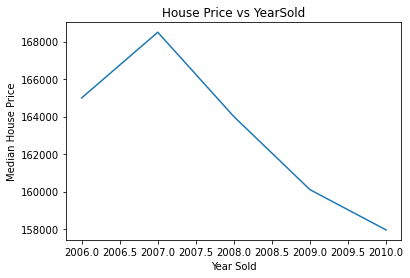

In [33]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [34]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

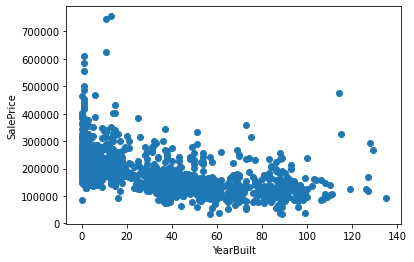

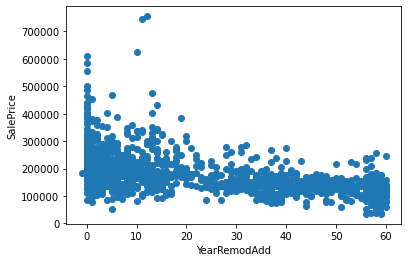

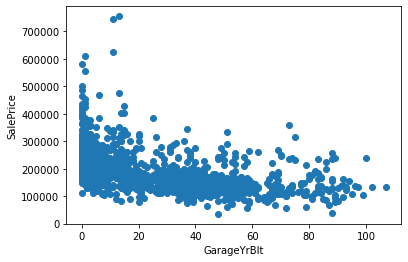

In [36]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=data.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [38]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 18


In [39]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [40]:
data[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscFeature,MiscVal,MoSold
0,120,6,5,0,0,0,2,0,2,1,5,1,2,0,0,1,0,2
1,20,8,6,0,1,0,2,0,4,1,8,1,2,0,0,1,0,10
2,60,7,5,0,1,0,2,1,3,1,8,1,2,0,0,1,0,6
3,20,6,6,0,0,0,2,0,3,1,7,1,2,0,0,1,0,1
4,20,6,7,0,0,1,2,0,3,1,8,1,2,0,0,1,0,6


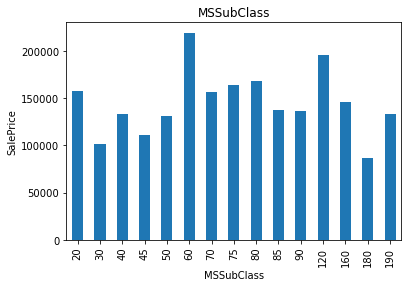

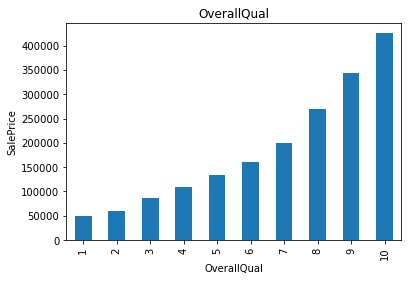

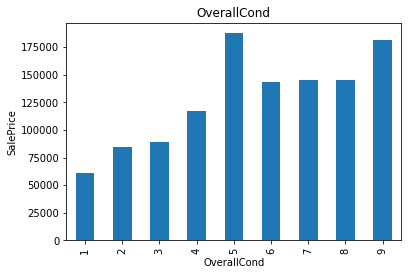

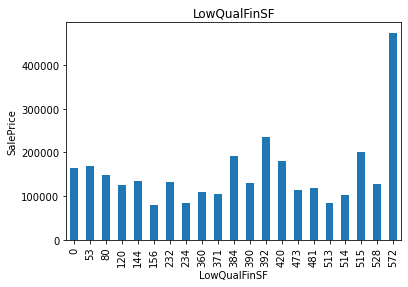

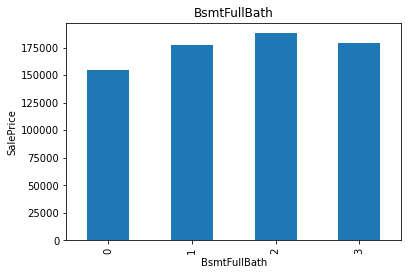

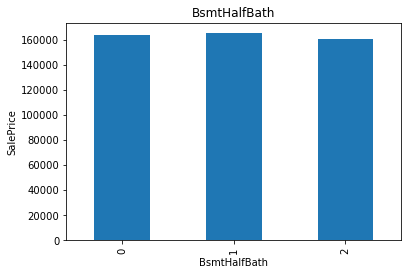

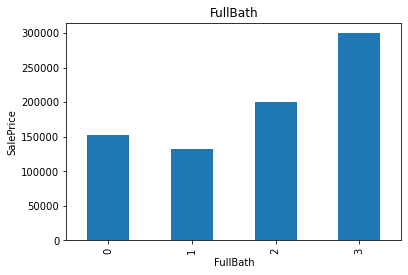

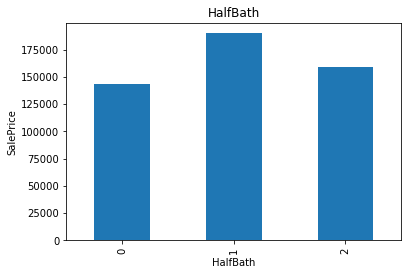

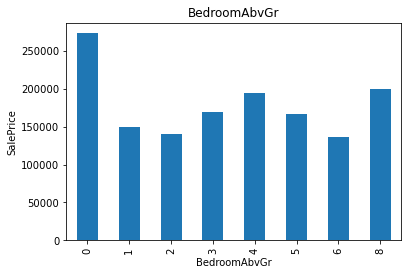

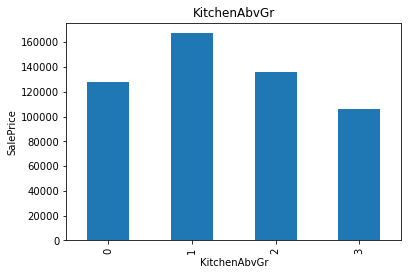

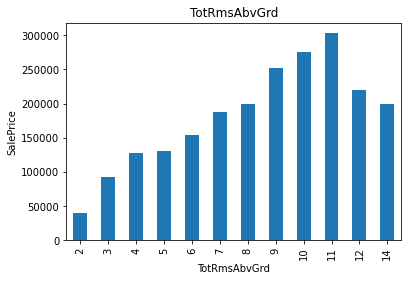

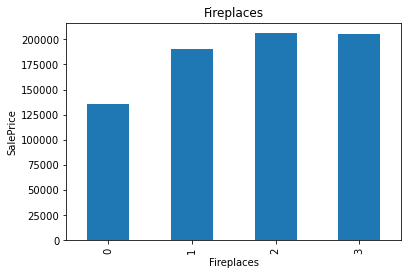

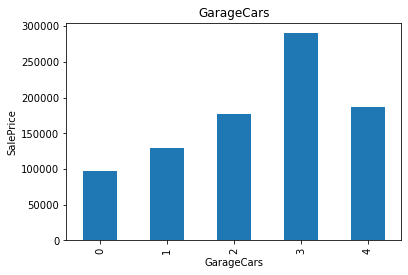

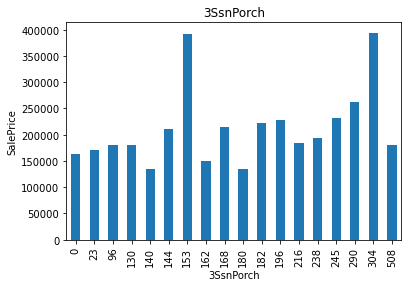

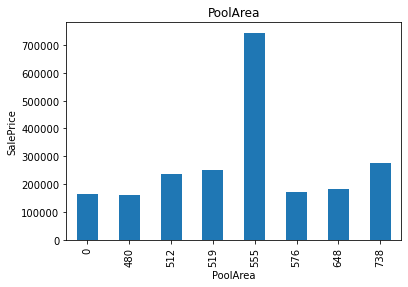

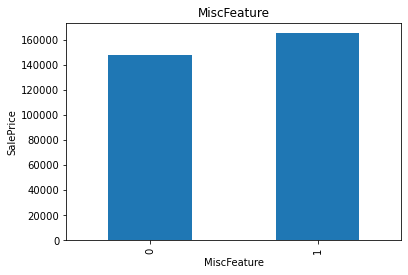

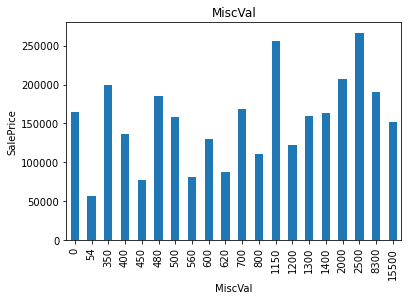

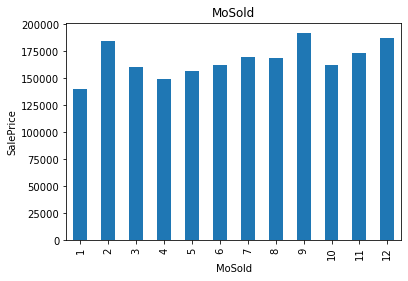

In [41]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [42]:
## There is a relationship between variable number and SalePrice

In [43]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


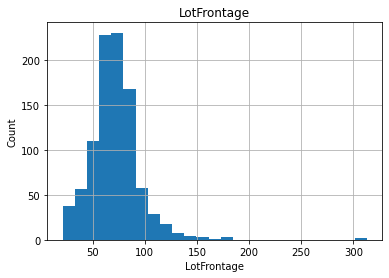

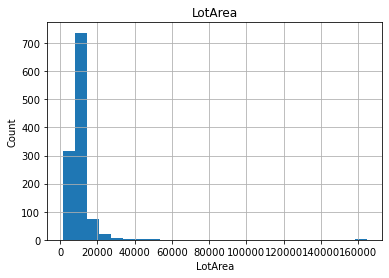

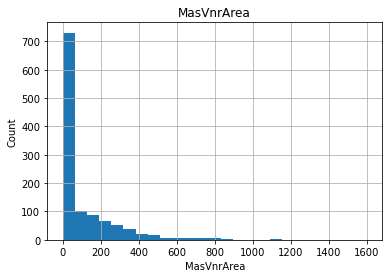

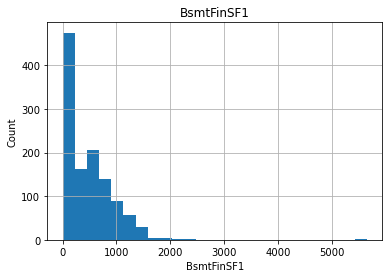

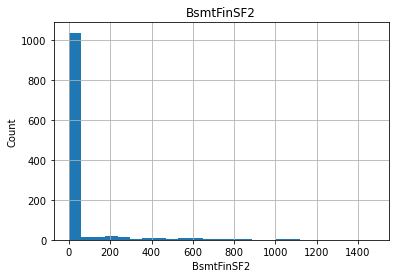

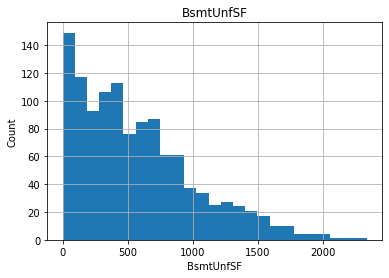

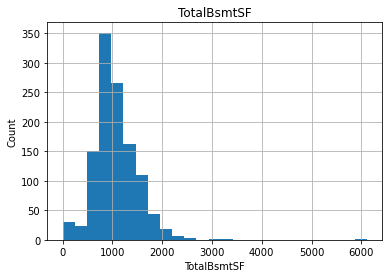

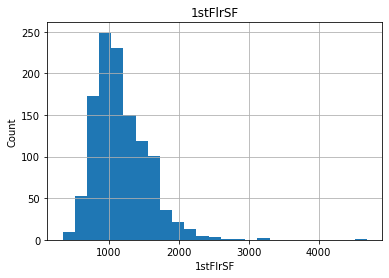

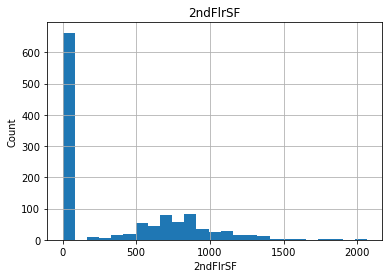

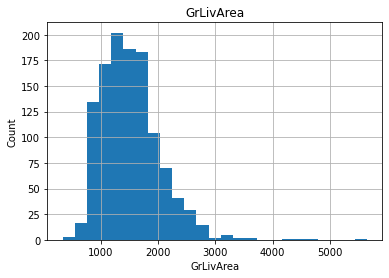

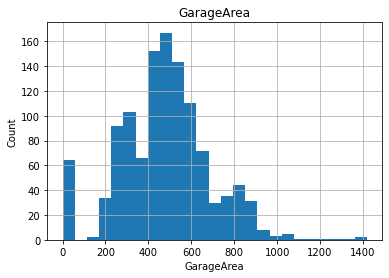

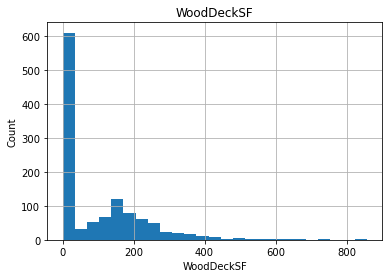

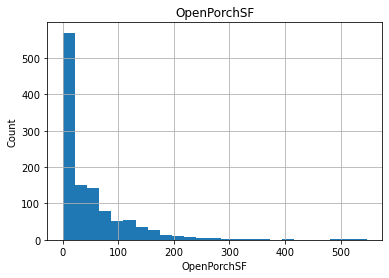

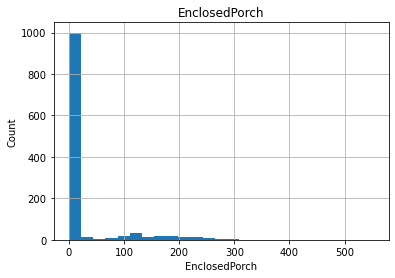

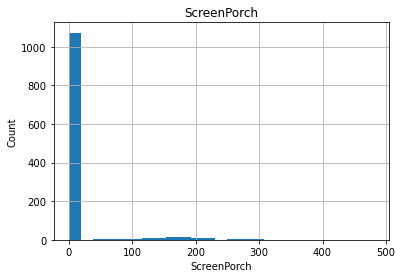

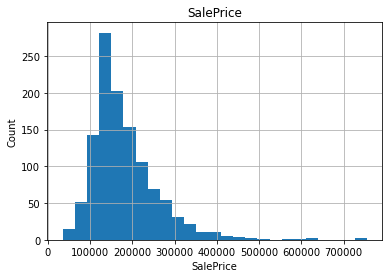

In [45]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

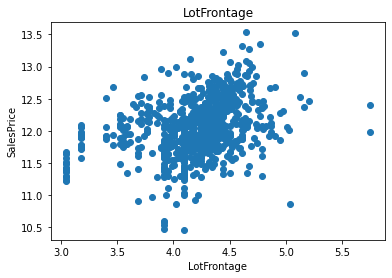

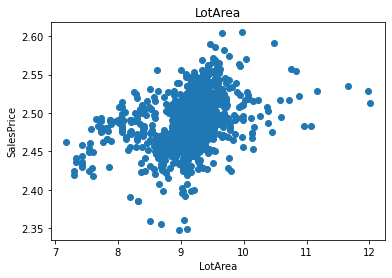

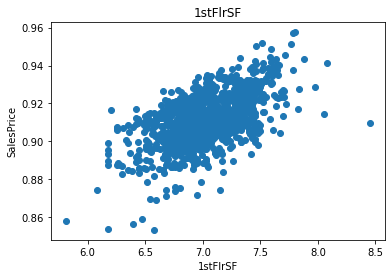

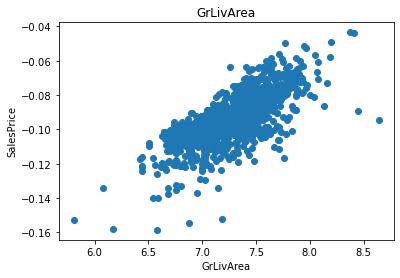

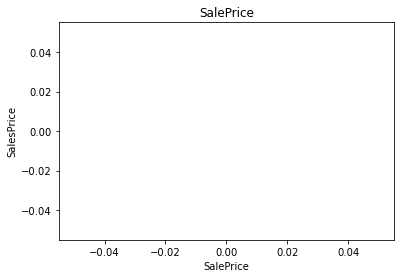

In [46]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

Outliers

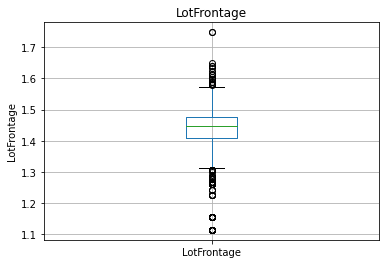

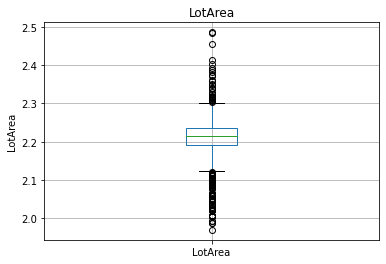

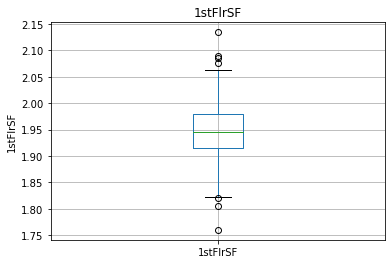

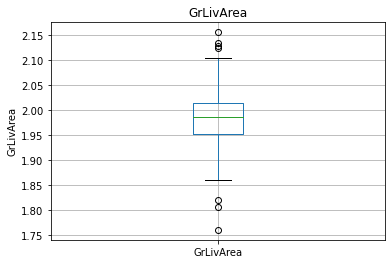

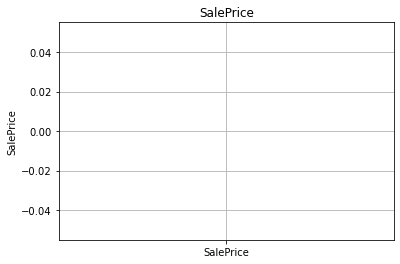

In [47]:
for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [49]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'SaleType',
 'SaleCondition']

In [50]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,...,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,...,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Attchd,RFn,TA,TA,Y,NaN,MnPrv,COD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,...,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,WD,Normal


In [52]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 1
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

## Find out the relationship between categorical variable and dependent feature SalesPrice

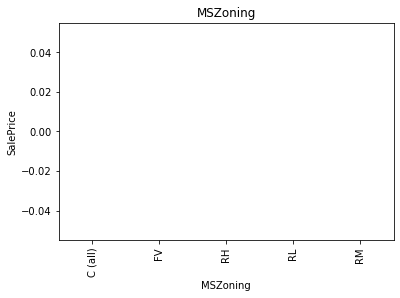

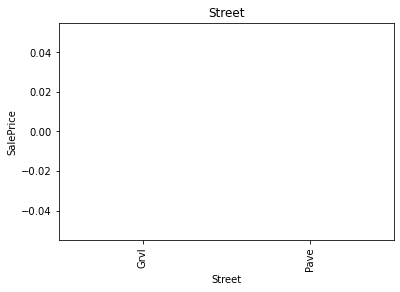

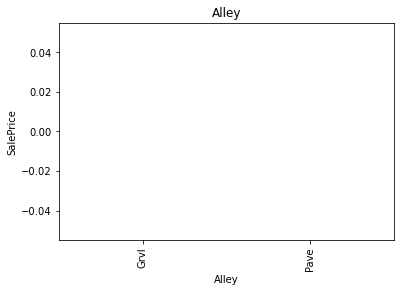

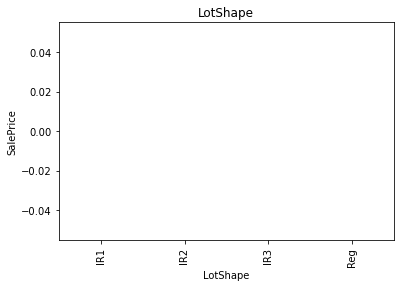

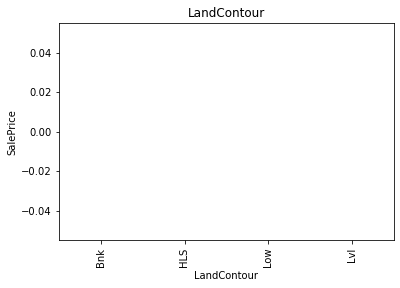

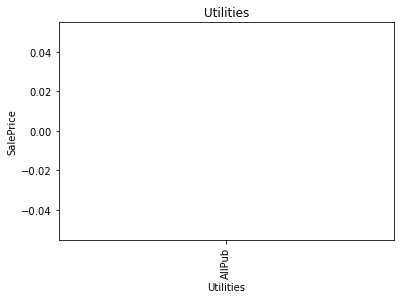

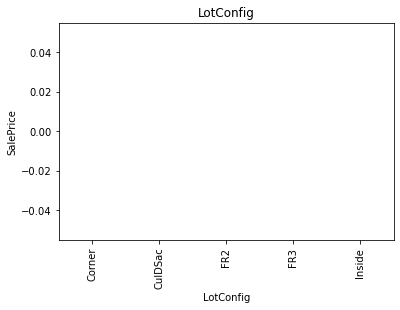

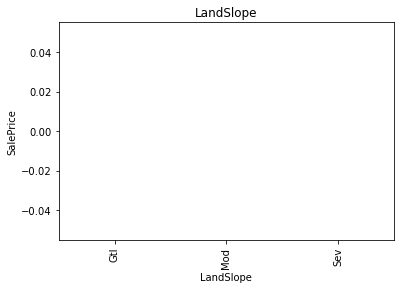

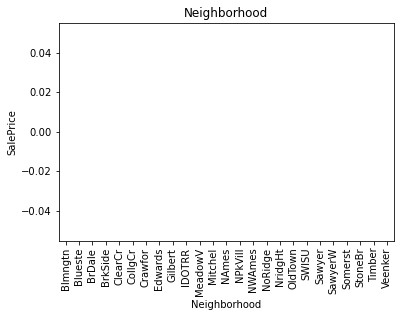

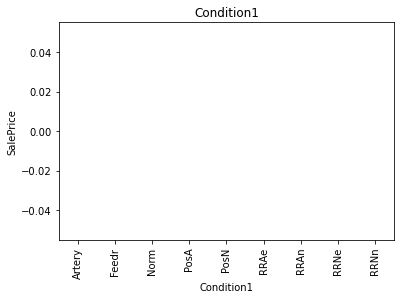

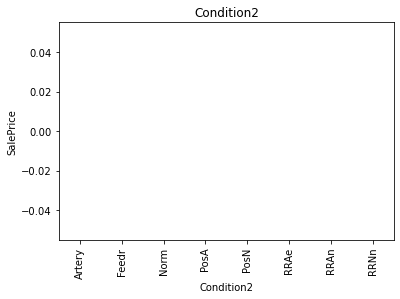

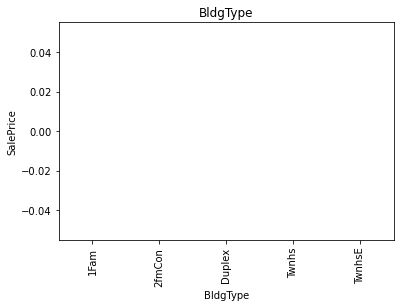

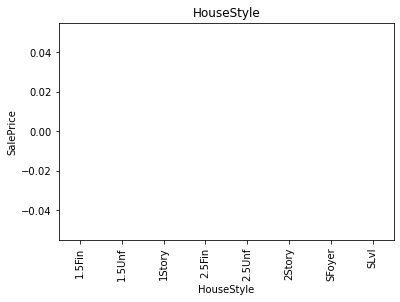

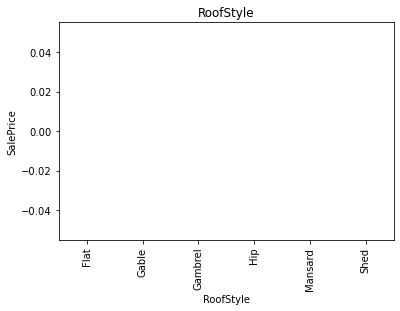

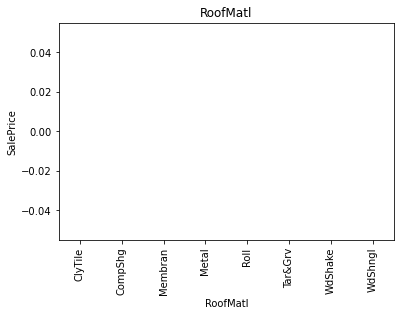

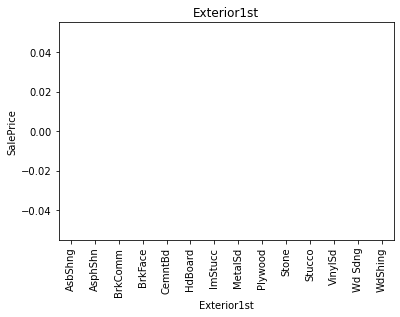

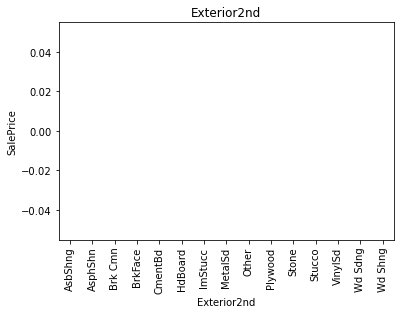

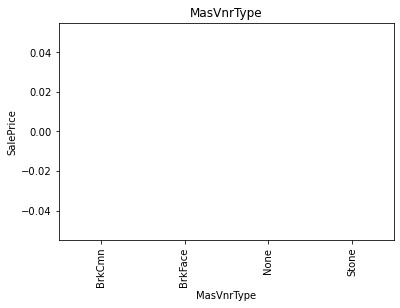

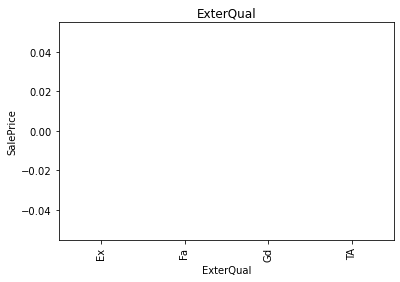

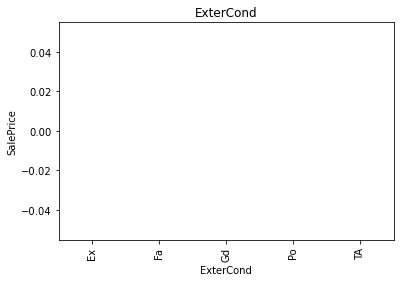

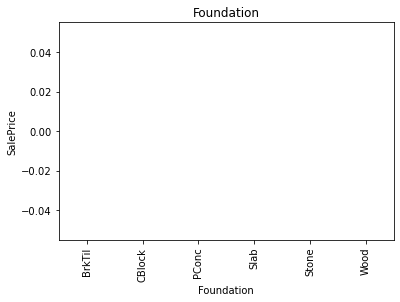

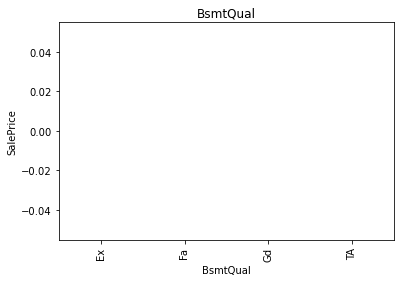

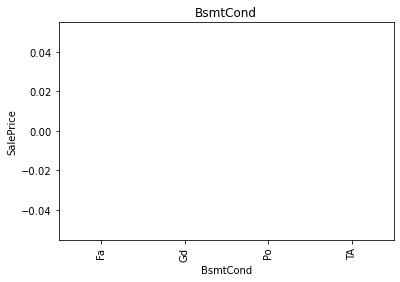

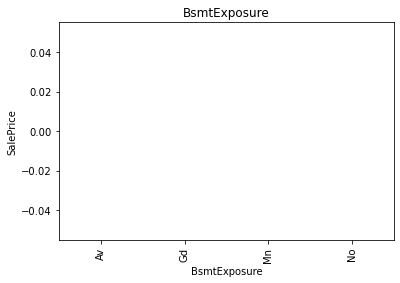

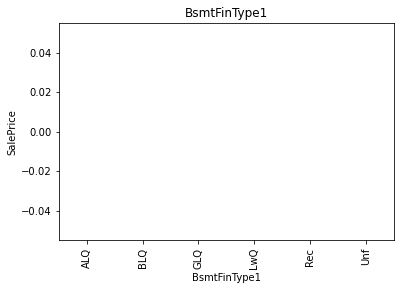

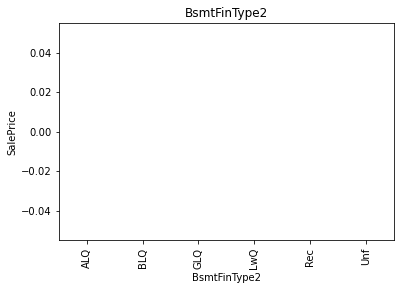

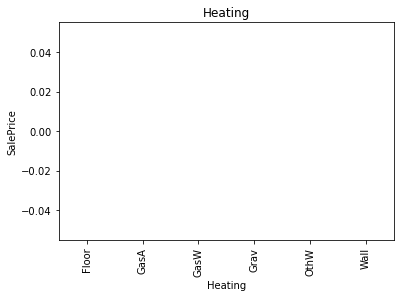

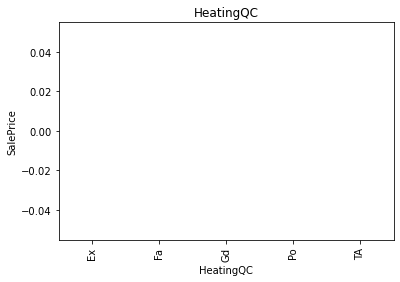

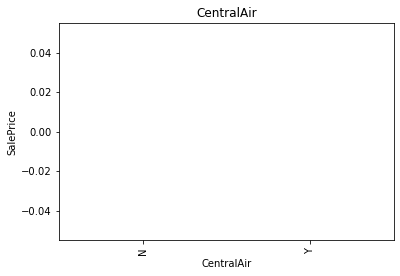

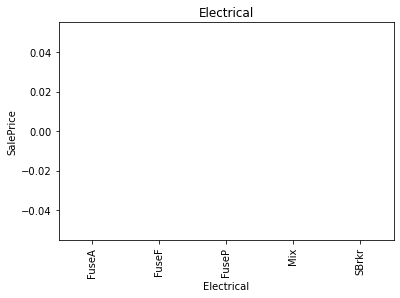

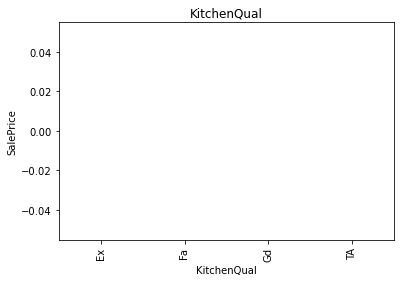

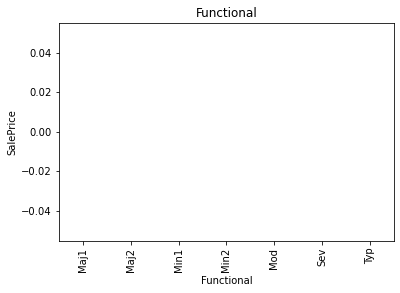

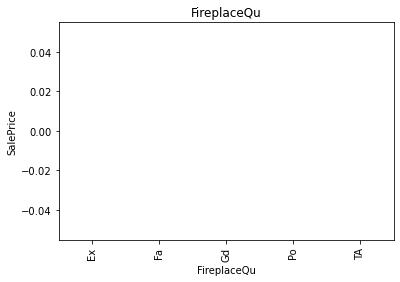

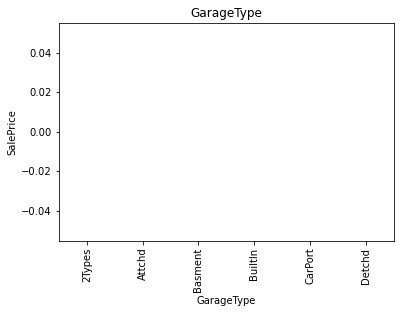

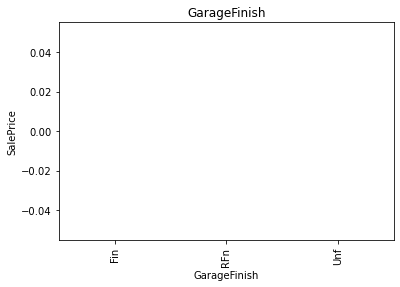

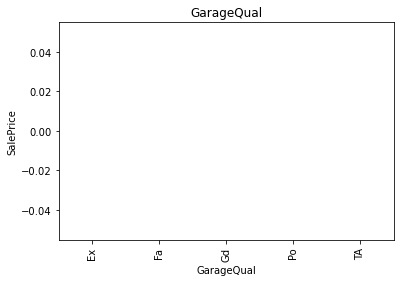

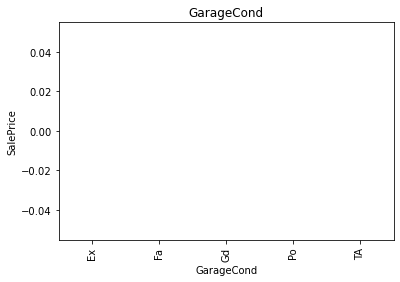

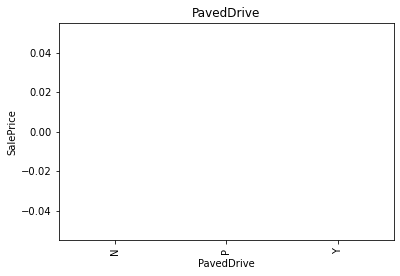

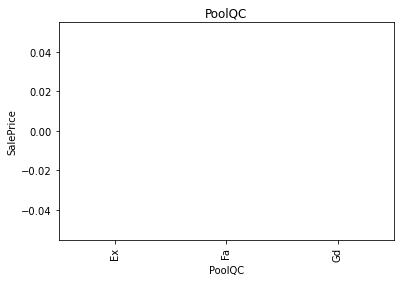

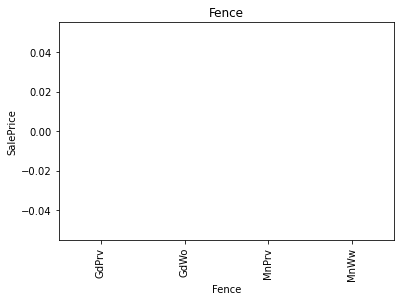

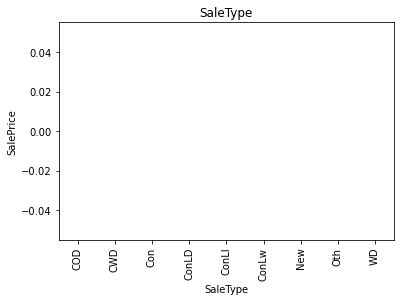

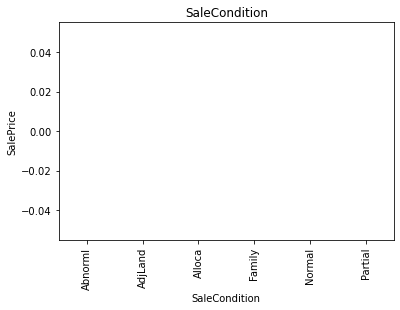

In [59]:
for feature in categorical_features:
    
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()